In [1]:
# Manipulación y tratamiento de Datos
import numpy as np
import pandas as pd

# Visualización de datos
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Modelación Arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller

# Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

# No presentar advertencias
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf

In [5]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [6]:
df = pd.read_csv('temperaturesbarcelonadesde1780.csv')
df.head()

,Any,Temp_Mitjana_Gener,Temp_Mitjana_Febrer,Temp_Mitjana_Marc,Temp_Mitjana_Abril,Temp_Mitjana_Maig,Temp_Mitjana_Juny,Temp_Mitjana_Juliol,Temp_Mitjana_Agost,Temp_Mitjana_Setembre,Temp_Mitjana_Octubre,Temp_Mitjana_Novembre,Temp_Mitjana_Desembre
0,1786,7.8,8.3,9.9,12.8,16.8,20.2,20.9,21.1,19.5,15.5,9.2,8.3
1,1787,5.4,7.8,11.3,12.1,14.7,19.2,21.0,21.8,19.4,15.5,9.3,10.8
2,1788,6.4,10.1,10.4,12.5,17.1,19.2,22.1,23.0,19.1,15.5,10.5,5.4
3,1789,6.9,9.3,8.7,13.3,17.7,18.5,20.9,21.9,20.0,14.7,7.8,7.3
4,1790,7.4,9.5,10.4,12.3,15.0,19.0,20.8,23.1,19.3,17.1,11.7,7.9


In [7]:
df.describe()


,Any,Temp_Mitjana_Gener,Temp_Mitjana_Febrer,Temp_Mitjana_Marc,Temp_Mitjana_Abril,Temp_Mitjana_Maig,Temp_Mitjana_Juny,Temp_Mitjana_Juliol,Temp_Mitjana_Agost,Temp_Mitjana_Setembre,Temp_Mitjana_Octubre,Temp_Mitjana_Novembre,Temp_Mitjana_Desembre
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,1904.000000,7.671308,8.616878,10.308861,12.487342,15.927848,19.633333,22.526582,22.663291,19.834177,15.858650,11.229958,8.364135
std,68.560193,1.506237,1.640887,1.409609,1.243086,1.501943,1.651613,1.580553,1.410840,1.392250,1.439949,1.395843,1.459663
min,1786.000000,3.400000,2.500000,6.100000,9.400000,11.500000,15.700000,18.400000,18.800000,16.000000,11.000000,7.300000,4.400000
25%,1845.000000,6.700000,7.700000,9.500000,11.600000,14.900000,18.500000,21.400000,21.700000,18.800000,14.900000,10.400000,7.300000
50%,1904.000000,7.700000,8.600000,10.300000,12.500000,15.900000,19.600000,22.400000,22.500000,19.800000,15.800000,11.300000,8.500000
75%,1963.000000,8.900000,9.600000,11.100000,13.300000,16.900000,20.700000,23.500000,23.600000,20.800000,16.700000,12.100000,9.300000
max,2022.000000,10.700000,12.800000,14.800000,15.900000,20.700000,25.600000,27.100000,28.500000,23.900000,20.700000,15.200000,12.600000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Any                    237 non-null    int64  
 1   Temp_Mitjana_Gener     237 non-null    float64
 2   Temp_Mitjana_Febrer    237 non-null    float64
 3   Temp_Mitjana_Marc      237 non-null    float64
 4   Temp_Mitjana_Abril     237 non-null    float64
 5   Temp_Mitjana_Maig      237 non-null    float64
 6   Temp_Mitjana_Juny      237 non-null    float64
 7   Temp_Mitjana_Juliol    237 non-null    float64
 8   Temp_Mitjana_Agost     237 non-null    float64
 9   Temp_Mitjana_Setembre  237 non-null    float64
 10  Temp_Mitjana_Octubre   237 non-null    float64
 11  Temp_Mitjana_Novembre  237 non-null    float64
 12  Temp_Mitjana_Desembre  237 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 24.2 KB


In [9]:
#rename columns
df.rename(columns={'Temp_Mitjana_Gener': "1",
                   'Temp_Mitjana_Febrer': "2",
                   'Temp_Mitjana_Marc': "3",
                   'Temp_Mitjana_Abril': "4",
                   'Temp_Mitjana_Maig': "5",
                   'Temp_Mitjana_Juny': "6",
                   'Temp_Mitjana_Juliol': "7",
                   'Temp_Mitjana_Agost': "8",
                   'Temp_Mitjana_Setembre': "9",
                   'Temp_Mitjana_Octubre': "10",
                   'Temp_Mitjana_Novembre': "11",
                   'Temp_Mitjana_Desembre': "12"},inplace=True)

In [10]:
df.columns

Index(['Any', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')

In [11]:
import seaborn as sns

<Axes: xlabel='Any'>

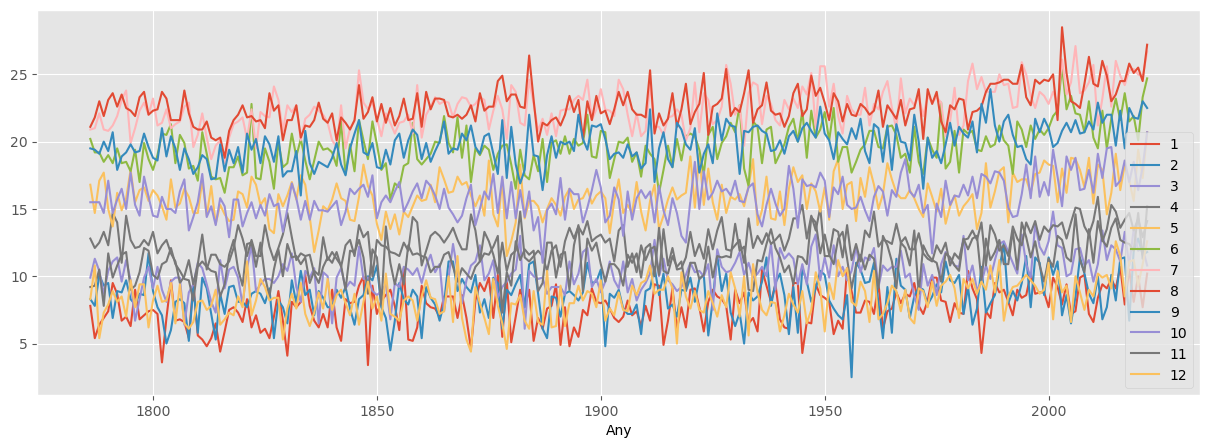

In [12]:
df.plot(x= 'Any',figsize=(15, 5))

In [13]:
# Creates a pivot table dataframe
table = df.melt(id_vars=['Any'], value_vars=['1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12'])

In [14]:
table["Data"] = pd.to_datetime(dict(year=table["Any"], month=table["variable"], day="1"))

In [15]:
table.head()

,Any,variable,value,Data
0,1786,1,7.8,1786-01-01
1,1787,1,5.4,1787-01-01
2,1788,1,6.4,1788-01-01
3,1789,1,6.9,1789-01-01
4,1790,1,7.4,1790-01-01


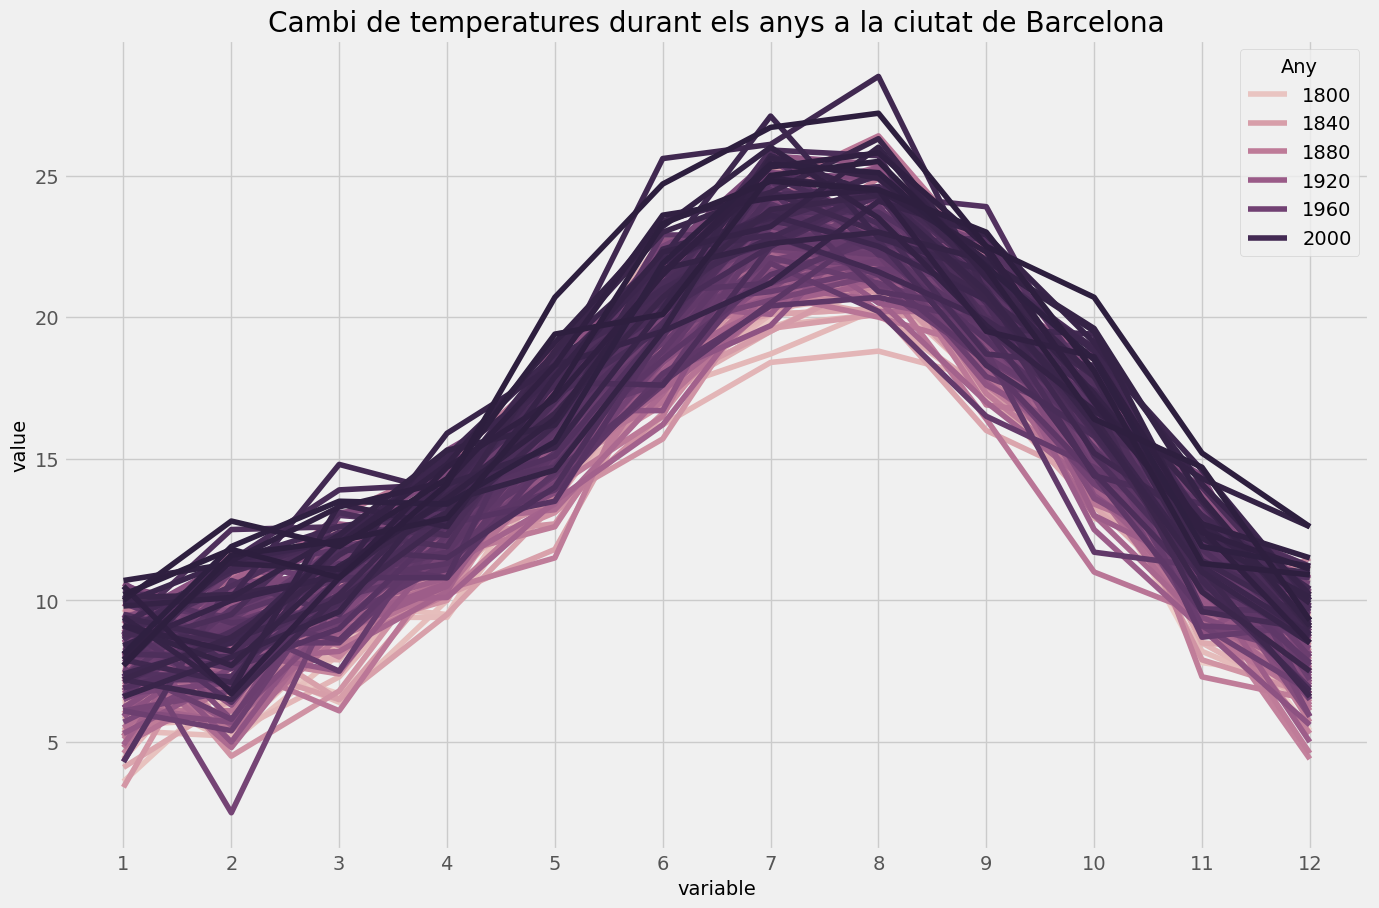

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Cambi de temperatures durant els anys a la ciutat de Barcelona")
sns.lineplot(data = table, x='variable', y='value', hue='Any')
plt.show()

In [17]:
df = table.set_index("Data")
df

,Any,variable,value
Data,,,
1786-01-01,1786,1,7.8
1787-01-01,1787,1,5.4
1788-01-01,1788,1,6.4
1789-01-01,1789,1,6.9
1790-01-01,1790,1,7.4
...,...,...,...
2018-12-01,2018,12,11.1
2019-12-01,2019,12,11.2
2020-12-01,2020,12,9.3


In [18]:
df = df.drop(['Any', 'variable'], axis=1)

In [19]:
df = df.groupby(['Data']).mean()

In [20]:
fig = px.line(df, x= df.index, y="value", template = "plotly_dark", title="Temperaturas en Barcelona desde 1780")
fig.show()

In [21]:
def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [22]:
Prueba_Dickey_Fuller(df["value"],"value")

Resultados de la prueba de Dickey-Fuller para columna: value
Test Statistic                          -3.180457
p-value                                  0.021144
No Lags Used                            25.000000
Número de observaciones utilizadas    2818.000000
Critical Value (1%)                     -3.432673
Critical Value (5%)                     -2.862566
Critical Value (10%)                    -2.567316
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


count    2844.000000
mean       14.593530
std         5.529662
min         2.500000
25%         9.700000
50%        14.000000
75%        19.700000
max        28.500000
Name: value, dtype: float64

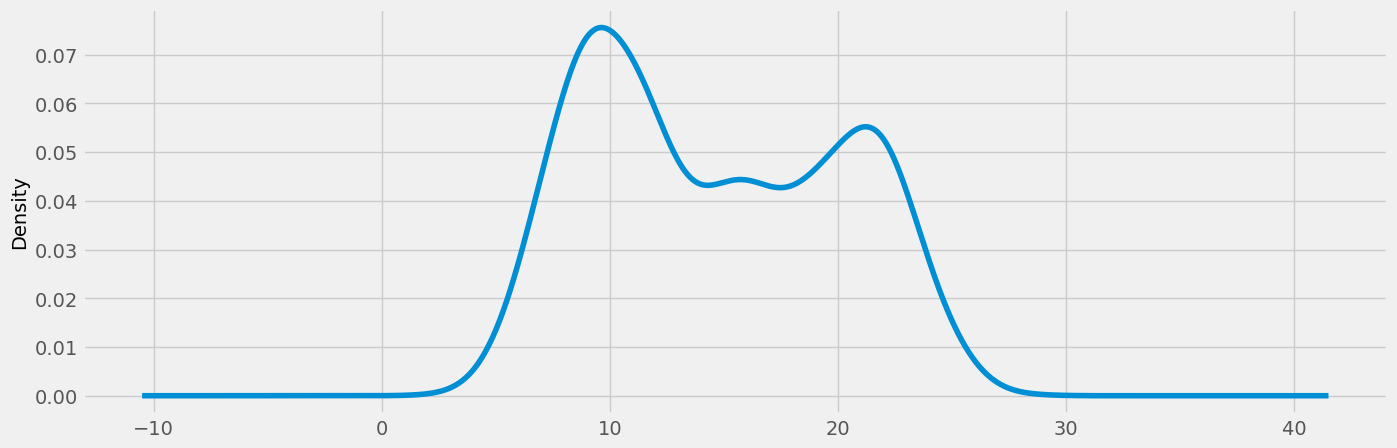

In [23]:
df["value"].plot(kind='kde', figsize =(15,5))
df["value"].describe()

In [24]:
df1=df.copy()

In [25]:

df1['value_diff'] = df['value'].diff().fillna(0)
df1['value_diff2'] = df1['value_diff'].diff().fillna(0)


In [26]:
# Take a look at the head of the dataset
df1.head()

,value,value_diff,value_diff2
Data,,,
1786-01-01,7.8,0.0,0.0
1786-02-01,8.3,0.5,0.5
1786-03-01,9.9,1.6,1.1
1786-04-01,12.8,2.9,1.3
1786-05-01,16.8,4.0,1.1


In [27]:
# df1 = df1.drop(['Any', 'variable'], axis=1)

In [28]:
Prueba_Dickey_Fuller(df1["value_diff"],"value_diff")

Resultados de la prueba de Dickey-Fuller para columna: value_diff
Test Statistic                         -22.468216
p-value                                  0.000000
No Lags Used                            23.000000
Número de observaciones utilizadas    2820.000000
Critical Value (1%)                     -3.432671
Critical Value (5%)                     -2.862565
Critical Value (10%)                    -2.567316
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


Seasonal ARIMA, es una extensión de ARIMA que admite explícitamente datos de series temporales univariadas con un componente estacional. Agrega tres nuevos hiperparámetros para especificar la autorregresión (AR), diferenciación (I) y media móvil (MA) para el componente estacional de la serie, así como un parámetro adicional para el período de la estacionalidad.

Hay cuatro elementos estacionales que no forman parte de ARIMA que deben configurarse; ellos son:

P: orden autorregresivo estacional.
D: Orden de diferencia estacional.
P: Orden promedio móvil estacional.
m: El número de pasos de tiempo para un solo período estacional.

In [29]:
fig = px.line(df1, x= df1.index, y="value_diff", template = "plotly_dark", title="Temperaturas en Barcelona desde 1780")
fig.show()

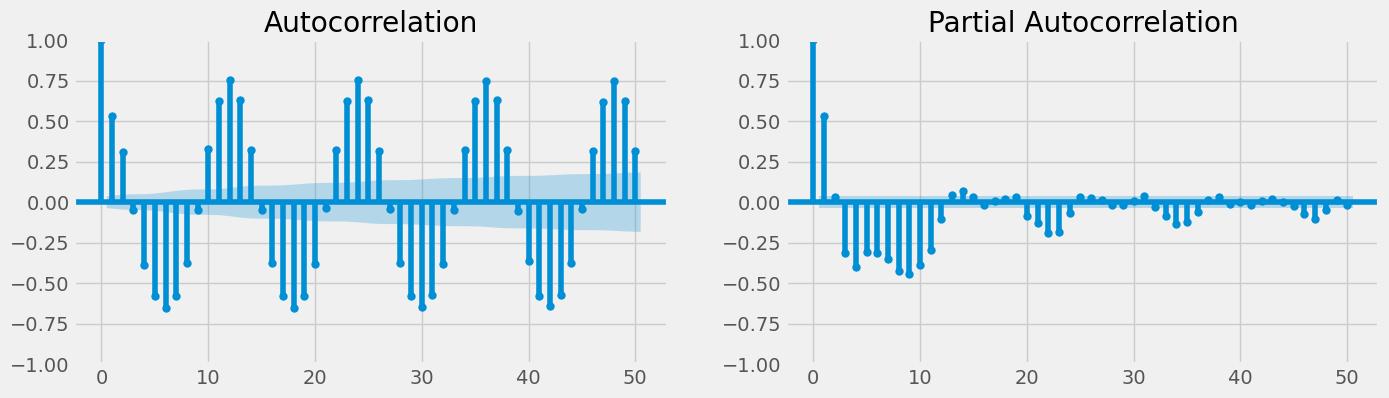

In [30]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
a = plot_acf( df1["value_diff"],lags=50, ax=axes[0])
b = plot_pacf(df1["value_diff"],lags=50, ax=axes[1])
plt.show(a)
plt.show(b)

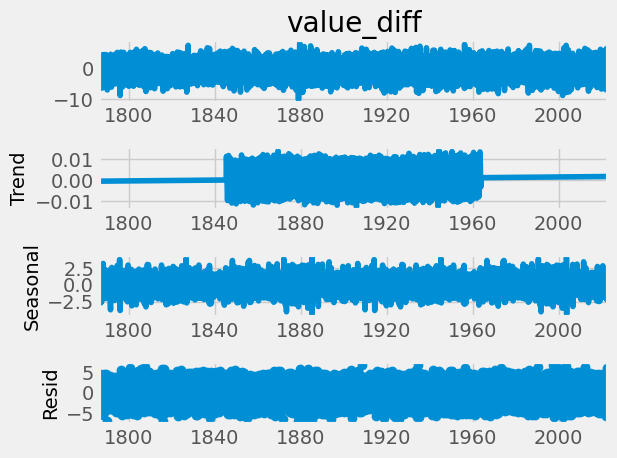

In [31]:
result = seasonal_decompose(df1['value_diff'], model='add',extrapolate_trend='freq', period = int(len(df1)/2))
result.plot()
plt.show()

In [32]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
test=test_data.copy()
train_data.shape, test_data.shape

((2832, 1), (12, 1))

In [33]:
print(f"Fechas datos_train : {train_data.index.min()} --- {train_data.index.max()}  (n={len(train_data)})")

print(f"Fechas datos_test  : {test_data.index.min()} --- {test_data.index.max()}  (n={len(test_data)})")


Fechas datos_train : 1786-01-01 00:00:00 --- 2021-12-01 00:00:00  (n=2832)
Fechas datos_test  : 2022-01-01 00:00:00 --- 2022-12-01 00:00:00  (n=12)


In [34]:
test_data.head(3)

,value
Data,
2022-01-01,10.2
2022-02-01,11.8
2022-03-01,10.8


3.1 AUTOARIMA

In [35]:
!pip install pmdarima

In [36]:
from pmdarima import auto_arima  

In [37]:
modelo_auto=auto_arima(train_data,start_p=0,d=1,start_q=0,
          max_p=4,max_d=2,max_q=4, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=1,
          max_Q=2, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)
print(modelo_auto)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=12627.535, Time=0.24 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=11285.044, Time=0.67 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.30 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=12124.025, Time=0.35 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=10968.007, Time=1.70 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.09 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.68 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=11484.919, Time=1.11 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=10724.424, Time=1.90 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=11055.551, Time=0.83 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=9.34 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.06 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=10610.684, Time=3.02 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=10932.769, Time=3.21 sec
 ARIMA(3,1,0)(2,1,1)[12]           

In [38]:
print(modelo_auto.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 2832
Model:             SARIMAX(4, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -5239.282
Date:                            Mon, 10 Jul 2023   AIC                          10492.563
Time:                                    06:16:48   BIC                          10534.172
Sample:                                01-01-1786   HQIC                         10507.577
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6277      0.018    -35.106      0.000      -0.663      -0.593
ar.L2         -0.4755      0.021   

In [39]:
arima_model = SARIMAX(train_data["value"], order = (4,1,0), seasonal_order = (2,1,0,12)) 
arima_result = arima_model.fit() 
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                 2832
Model:             SARIMAX(4, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -5239.282
Date:                            Mon, 10 Jul 2023   AIC                          10492.563
Time:                                    06:16:51   BIC                          10534.172
Sample:                                01-01-1786   HQIC                         10507.577
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6277      0.018    -35.106      0.000      -0.663      -0.593
ar.L2         -0.4755      0.021    -22.668      0.000      -0.517      -0.434
ar.L3         -0.3205      0.021    -15.239      0.000      -0.362      -0.279
ar.L4         -0.2043      0.018    -11.215      0.000      -0.240      -0.169
ar.S.L12      -0.6779      0.017    -40.091      0.000      -0.711      -0.645
ar.S.L24      -0.3335      0.017    -19.160      0.000      -0.368      -0.299
sigma2         2.4030      0.059     40.781      0.000       2.288       2.518
===================================================================================
Ljung-Box (L1) (Q):                   2.77   Jarque-Bera (JB):                19.00
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -0.07
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
plot_plotly(arima_model, arima_result)

NameError: name 'plot_plotly' is not defined

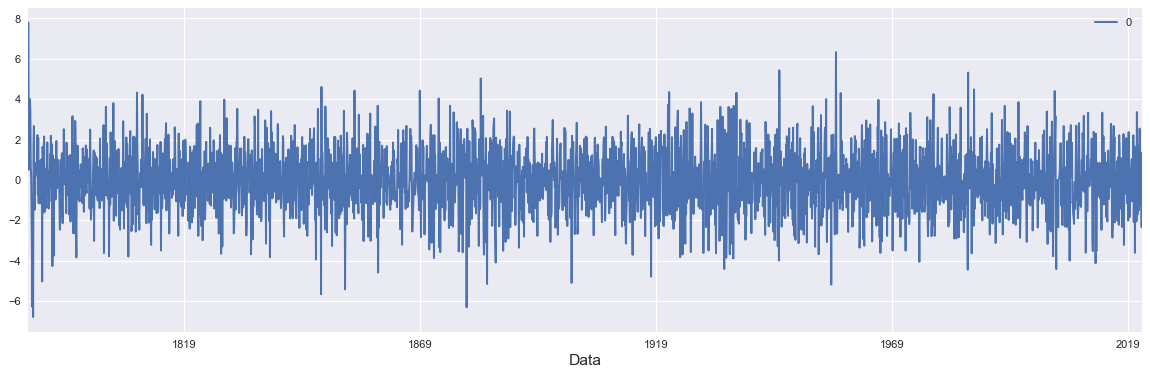

In [57]:
# Gráfico de línea de errores residuales
residuals = pd.DataFrame(arima_result.resid)
residuals.plot(figsize = (16,5));
plt.show();

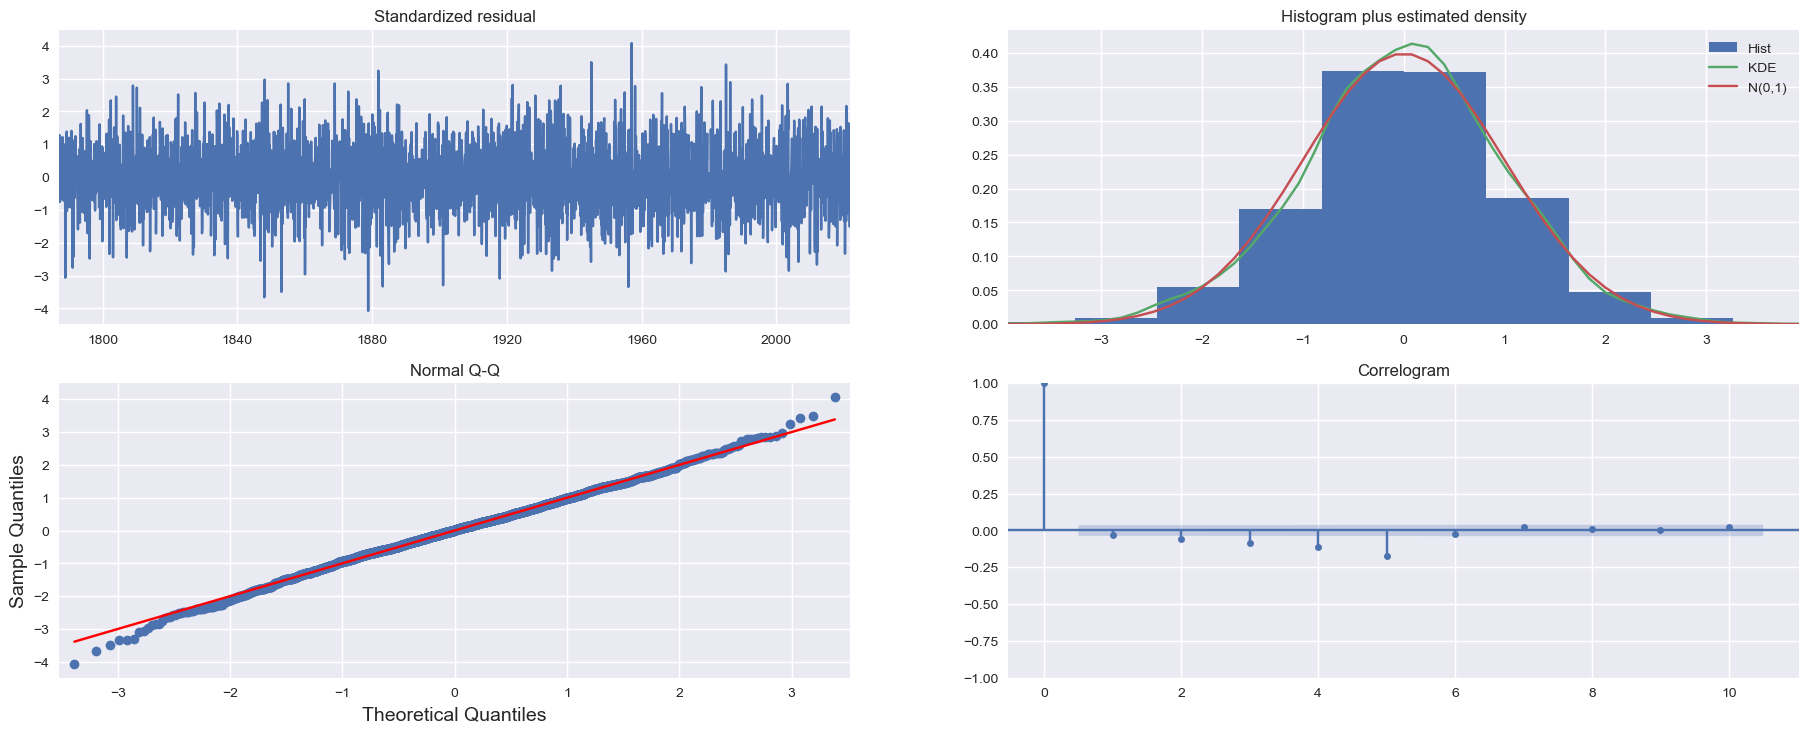

In [41]:
plt.style.use('seaborn')
modelo_auto.plot_diagnostics(figsize=(20,8))
plt.show()

In [42]:
len(train_data)

2832

In [43]:
len(df)-1

2843

In [44]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2022-01-01     8.540187
2022-02-01    12.169738
2022-03-01    12.524241
2022-04-01    13.253313
2022-05-01    17.419700
2022-06-01    21.665486
2022-07-01    25.007749
2022-08-01    24.977080
2022-09-01    22.042841
2022-10-01    17.572318
2022-11-01    12.595473
2022-12-01    10.371998
Freq: MS, Name: ARIMA Predictions, dtype: float64

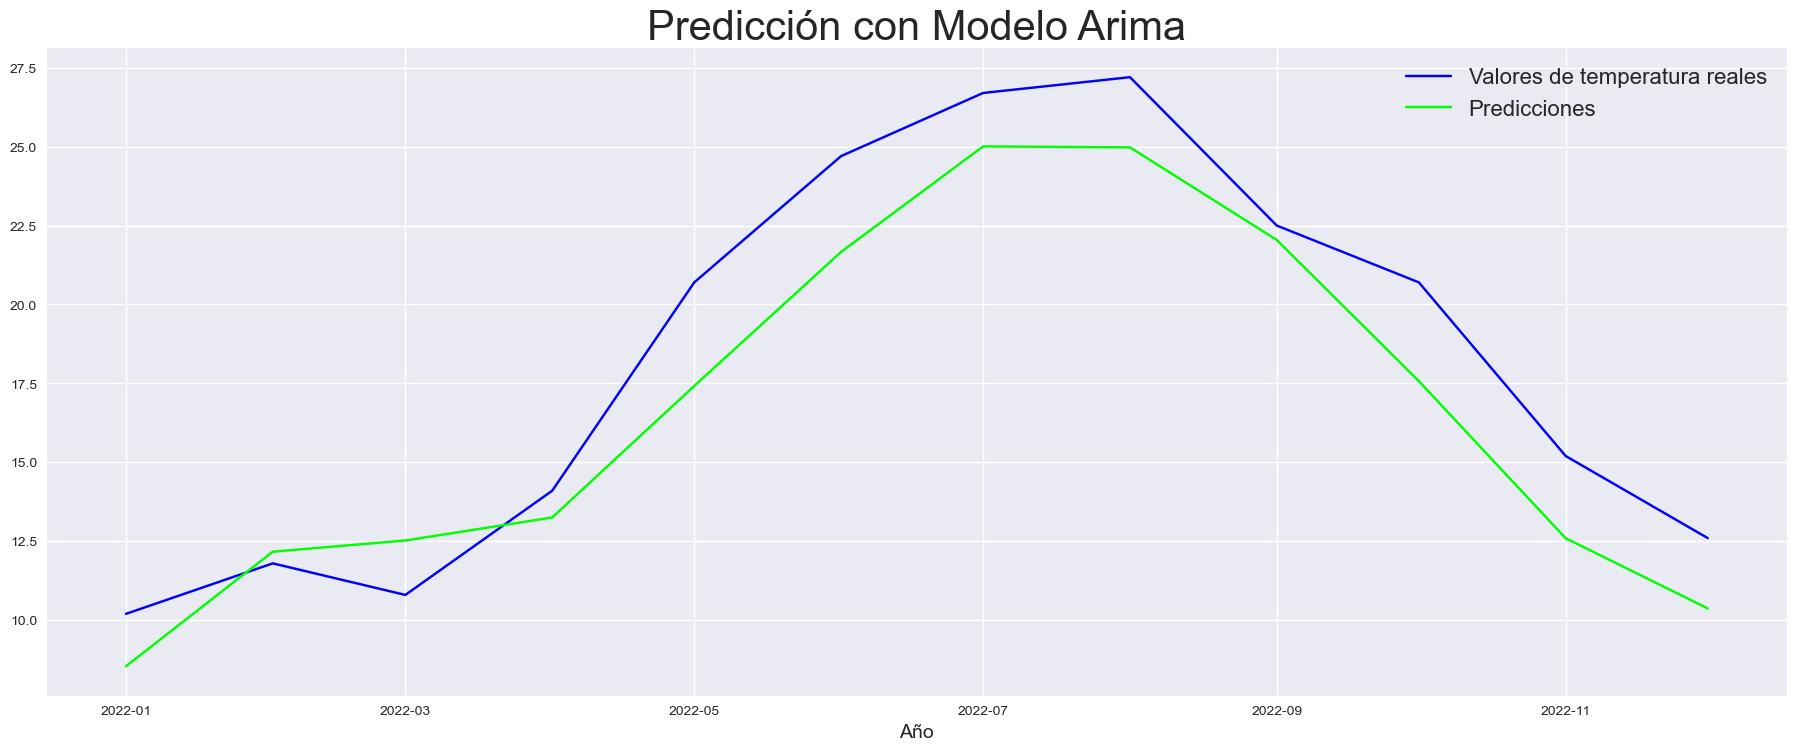

In [45]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20, 8)

plt.plot(test_data["value"],color="blue" ,label="Valores de temperatura reales")
plt.plot(arima_pred, color="lime", label="Predicciones")
plt.title("Predicción con Modelo Arima", fontsize=30);
plt.xlabel('Año')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show();

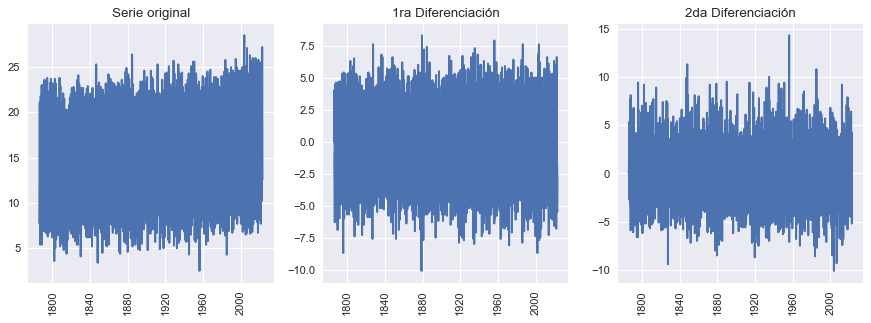

In [46]:
#ploting the original and diferenced series.

plt.rcParams.update({'figure.figsize':(12,4), 'figure.dpi':80})

# Original Series
fig, axes = plt.subplots(1, 3, sharex=True)
axes[0].plot(df['value']) 
axes[0].set_title('Serie original')

# 1st Diff
axes[1].plot(df1['value_diff'])
axes[1].set_title('1ra Diferenciación')

# 2th Diff
axes[2].plot(df1['value_diff2'])
axes[2].set_title('2da Diferenciación')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
plt.show()

In [47]:
arima_pred2 = arima_result.predict(start='2015-01-01',end='2025-01-01', typ="levels").rename("ARIMA Predictions")
arima_pred2

2015-01-01     8.888517
2015-02-01     8.093180
2015-03-01    12.370532
2015-04-01    13.635411
2015-05-01    16.321257
                ...    
2024-09-01    22.326211
2024-10-01    17.575702
2024-11-01    12.140576
2024-12-01    10.386256
2025-01-01     8.398085
Freq: MS, Name: ARIMA Predictions, Length: 121, dtype: float64

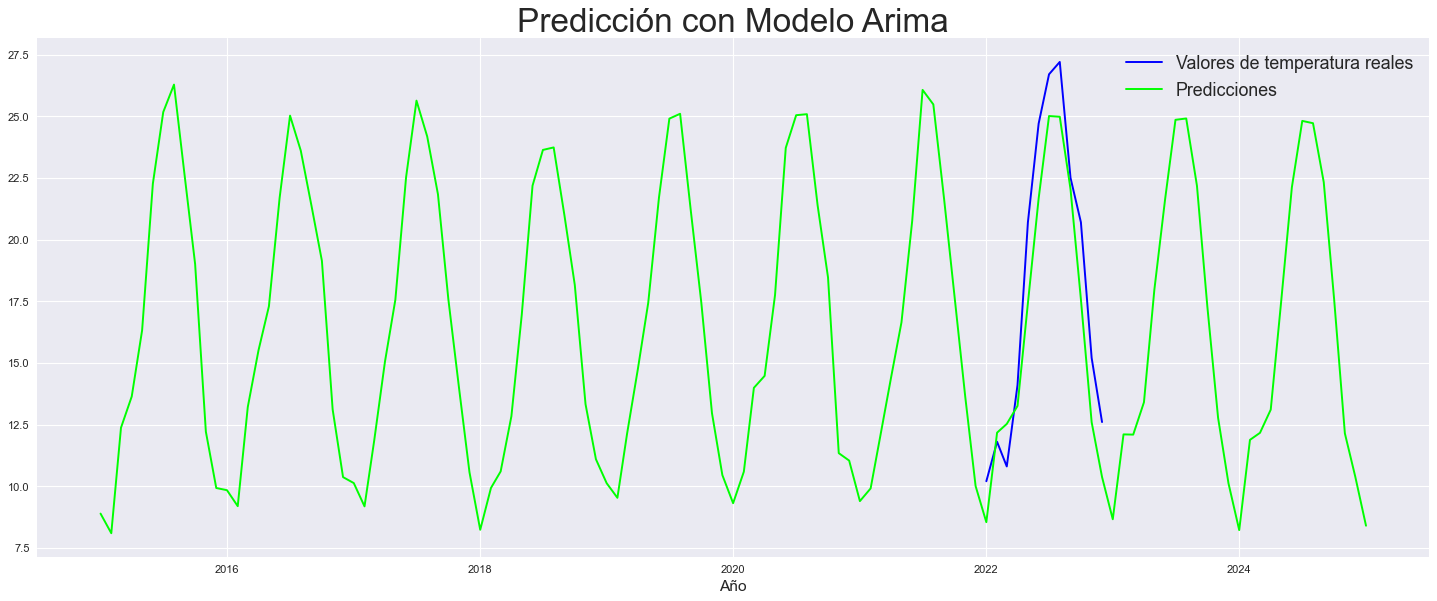

In [48]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20, 8)

plt.plot(test_data["value"],color="blue" ,label="Valores de temperatura reales")
plt.plot(arima_pred2, color="lime", label="Predicciones")
plt.title("Predicción con Modelo Arima", fontsize=30);
plt.xlabel('Año')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show();

In [49]:
def evaluacion_metrica(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [50]:
evaluacion_metrica(test_data["value"],arima_pred)

Evaluation metric results:-
MSE is : 4.674520995909241
MAE is : 1.9373197066149803
RMSE is : 2.162064059159497
MAPE is : 11.331498672440492
R2 is : 0.8734506791704397



In [51]:
test_data['ARIMA_Predictions']= arima_pred
test_data

,value,ARIMA_Predictions
Data,,
2022-01-01,10.2,8.540187
2022-02-01,11.8,12.169738
2022-03-01,10.8,12.524241
2022-04-01,14.1,13.253313
2022-05-01,20.7,17.419700
2022-06-01,24.7,21.665486
2022-07-01,26.7,25.007749
2022-08-01,27.2,24.977080
2022-09-01,22.5,22.042841


3.3 RANDOM FOREST

In [52]:
df.head()

,value
Data,
1786-01-01,7.8
1786-02-01,8.3
1786-03-01,9.9
1786-04-01,12.8
1786-05-01,16.8


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# Dividir el dataframe en variables de entrada (X) y variable de salida (y)
X = df.drop('target_variable', axis=1) # Reemplazar 'target_variable' por el nombre de tu variable de salida
y = df['target_variable']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión con Random Forest
rf_model = RandomForestRegressor()

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


KeyError: "['target_variable'] not found in axis"